<a href="https://colab.research.google.com/github/kdj0712/study_data_analytics/blob/main/docs/quests/DDA/extract_5Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치한 이후 무조건 세션 다시 시작하기 필요

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [6]:
df_SMDWD = pd.read_csv('sample_data/ShoppingMallDeliveryWithDate.csv')

In [7]:
df_SMDWD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [14]:
df_SMDWD.describe()

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


In [16]:
df_SMDWD['상품번호'].value_counts()

455.0     1700
1237.0    1577
1374.0    1486
1209.0    1457
1373.0    1453
          ... 
1504.0       1
1208.0       1
1241.0       1
1461.0       1
333.0        1
Name: 상품번호, Length: 648, dtype: int64

In [13]:
df_SMDWD.describe(include=object)

,결제수단,배송번호,배송시작일,배송완료일,주문경로
count,46749,46749,46749,46749,46749
unique,44,37691,1548,2559,3
top,무통장입금,D-20180316-0000178-00,2018-12-19 오후 5:36,2019-02-02 오전 5:32,PC쇼핑몰
freq,24171,7,388,547,25695


In [12]:
df_SMDWD['상품번호'].value_counts(), df_SMDWD['상품구매금액'].value_counts(),  df_SMDWD['수량'].value_counts()

(455.0     1700
 1237.0    1577
 1374.0    1486
 1209.0    1457
 1373.0    1453
           ... 
 1504.0       1
 1208.0       1
 1241.0       1
 1461.0       1
 333.0        1
 Name: 상품번호, Length: 648, dtype: int64,
 0         9148
 78870      768
 57850      555
 61900      472
 71450      453
           ... 
 63400        1
 231660       1
 444290       1
 99920        1
 76600        1
 Name: 상품구매금액, Length: 1872, dtype: int64,
 1     41110
 2      4199
 3       878
 4       252
 5       223
 6        40
 10       16
 7        11
 8         7
 15        5
 17        2
 16        1
 46        1
 20        1
 11        1
 50        1
 12        1
 Name: 수량, dtype: int64)

In [17]:
item_nums = df_SMDWD['상품번호'].value_counts()

In [29]:
best = item_nums.iloc[:3].index.to_list()

In [30]:
worst = item_nums.iloc[645:].index.to_list()

<Axes: xlabel='count', ylabel='상품번호'>

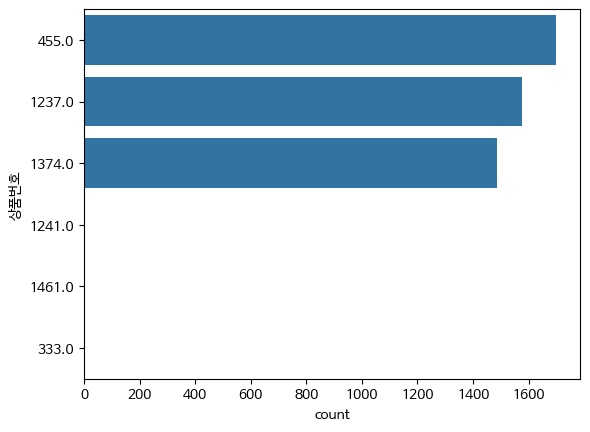

In [31]:
sns.countplot(data=df_SMDWD,y='상품번호',order=best+worst)

In [33]:
payment_method = df_SMDWD['결제수단'].value_counts()

In [35]:
df_SMDWD['결제수단'].describe()

count     46749
unique       44
top       무통장입금
freq      24171
Name: 결제수단, dtype: object

In [40]:
pay_method1  = payment_method.iloc[:3].index.to_list()

In [41]:
pay_method2 = payment_method.iloc[41:].index.to_list()

<Axes: xlabel='count', ylabel='결제수단'>

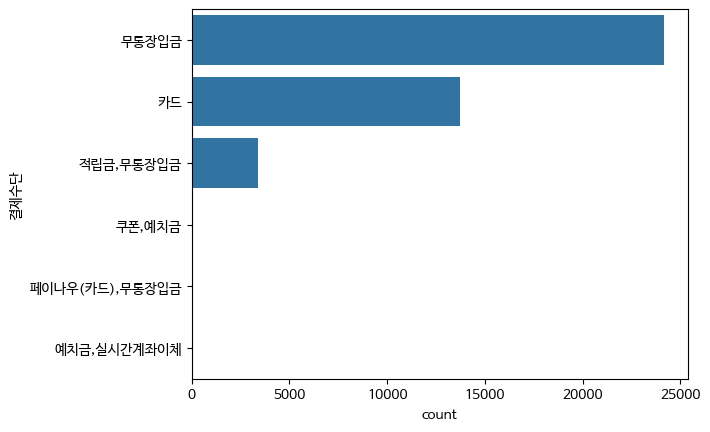

In [42]:
sns.countplot(data=df_SMDWD,y='결제수단',order=pay_method1+pay_method2)